In [608]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
import pandas as pd
import os
# pytorch imports
import torch
from torch.utils.data.sampler import SequentialSampler, Sampler
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Dataset
import math
import preprocessor 
from importlib import reload
reload(preprocessor)

import torch_utils
reload(torch_utils)

<module 'torch_utils' from 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\torch_utils.py'>

In [588]:
# get the device available
_device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(_device)

cuda


In [589]:
path = "C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\"

In [308]:
# Created a Dataset object to be passed to a DataLoader
bej_ds = preprocessor.BejingAirDataset(path, train=True)

self.files: ['C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Changping_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Dingling_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Dongsi_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Guanyuan_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Gucheng_20130301-2017

In [309]:
dinling_tensor = bej_ds[0]

In [310]:
[x.size() for x in dinling_tensor]

[torch.Size([35064, 30]), torch.Size([35064, 1])]

In [311]:
# Create training DataLoader
train_dl = preprocessor.get_dataloader(bej_ds, device=_device)

train indicies: [0 1 2 3 4 5 6 7 8]


In [312]:
print(train_dl)
print(len(train_dl))

9


In [313]:
len(bej_ds)

9

In [314]:
for x in train_dl:
    print(x.shape)
    print(x)

AttributeError: 'list' object has no attribute 'shape'

In [590]:
bej_ds2 = preprocessor.BejingAirDataset(path)

self.files: ['C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Changping_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Dingling_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Dongsi_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Guanyuan_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\train\\PRSA_Data_Gucheng_20130301-2017

In [591]:
train_dl2 = preprocessor.get_dataloader2(bej_ds2,device=_device)

In [592]:
for x, y in train_dl2:
    #print(x.size())
    print("Features:")
    print(x.size())
    print(x)
    print("Targets:")
    print(y.size())
    print(y)
    break

Features:
torch.Size([1, 35064, 30])
tensor([[[-1.0804, -0.5269, -1.1798,  ...,  0.0000,  0.0000,  0.0000],
         [-1.0369, -0.5269, -1.1798,  ...,  0.0000,  0.0000,  0.0000],
         [-1.0478, -0.4817, -1.0934,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.7217, -0.2557,  0.5200,  ...,  0.0000,  0.0000,  0.0000],
         [-0.6456, -0.1653,  1.1250,  ...,  0.0000,  0.0000,  0.0000],
         [-0.7869, -0.2557,  0.8945,  ...,  0.0000,  0.0000,  0.0000]]],
       device='cuda:0', dtype=torch.float64)
Targets:
torch.Size([1, 35064, 1])
tensor([[[-0.9307],
         [-0.8810],
         [-0.8935],
         ...,
         [-0.7817],
         [-0.7196],
         [-0.7445]]], device='cuda:0', dtype=torch.float64)


In [315]:
train_dl[0]

TypeError: 'DeviceDataLoader' object is not subscriptable

In [593]:
train_indices, val_indicies = preprocessor.split_indicies(35064, 0.1)
len(train_indices)

31559

In [594]:
x_len = None
for x, y in train_dl2:
    #print(x.size())
    x_len = x.size()[1]
    print(x.size())
    x, val = torch.split(x, [len(train_indices),len(val_indicies)], dim=1)
    train_y, val_y = torch.split(y, [len(train_indices),len(val_indicies)], dim=1)
    print("Train:")
    
    print(x.size())
    #print(x)
    
    print(train_y.size())
    #print(train_y)
    
    print()
    print("Val:")
    print(val.size())
    #print(val)
    
    print(val_y.size())
    #print(val_y)
    

torch.Size([1, 35064, 30])
Train:
torch.Size([1, 31559, 30])
torch.Size([1, 31559, 1])

Val:
torch.Size([1, 3505, 30])
torch.Size([1, 3505, 1])
torch.Size([1, 35064, 30])
Train:
torch.Size([1, 31559, 30])
torch.Size([1, 31559, 1])

Val:
torch.Size([1, 3505, 30])
torch.Size([1, 3505, 1])
torch.Size([1, 35064, 30])
Train:
torch.Size([1, 31559, 30])
torch.Size([1, 31559, 1])

Val:
torch.Size([1, 3505, 30])
torch.Size([1, 3505, 1])
torch.Size([1, 35064, 30])
Train:
torch.Size([1, 31559, 30])
torch.Size([1, 31559, 1])

Val:
torch.Size([1, 3505, 30])
torch.Size([1, 3505, 1])
torch.Size([1, 35064, 30])
Train:
torch.Size([1, 31559, 30])
torch.Size([1, 31559, 1])

Val:
torch.Size([1, 3505, 30])
torch.Size([1, 3505, 1])
torch.Size([1, 35064, 30])
Train:
torch.Size([1, 31559, 30])
torch.Size([1, 31559, 1])

Val:
torch.Size([1, 3505, 30])
torch.Size([1, 3505, 1])
torch.Size([1, 35064, 30])
Train:
torch.Size([1, 31559, 30])
torch.Size([1, 31559, 1])

Val:
torch.Size([1, 3505, 30])
torch.Size([1, 35

In [223]:
import torch
import torch.nn as nn


_device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size needs to be divisible by heads"

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        # Get number of training examples
        N = query.shape[0]

        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        query = query.reshape(N, query_len, self.heads, self.head_dim)

        values = self.values(values)  # (N, value_len, heads, head_dim)
        keys = self.keys(keys)
        queries = self.queries(query)

        # Einsum does matrix multiplication for query * keys for eag training example
        # with every other training example, don't be confused by einsum
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        # queries shape: (N, query_len, heads, heads_dim),
        # keys shape: (N, key_len, heads, heads_dim)
        # energy: (N, heads, query_len, key_len)

        # Marck padded indicies so their weights become 0
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        # Normalize energy values similarly to seq2seq + attention
        # so that they sum to 1. Also divide by scaling factor for
        # better stability
        attention = torch.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)
        # attention shape; (N, heads, query_len, key_len)

        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )
        # attention shape: (N, heads, query_len, key_len)
        # values shape: (N, value_len, heads, heads_dim)
        # out after matrix multiply: (N, query_len, heads, head_dim), then
        # we reshape and flatten the last two dimensions.

        out = self.fc_out(out)
        # Linear layer doesn't modify the shape, final shape will be
        # (N, query_len, embed_size)

        return out


class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()
        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        self.dropout = nn.Dropout(dropout)

        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size),
        )

    def forward(self, value, key, query, mask):
        attention = self.attention(value, key, query, mask)
        # Add skip connection, run through normalization and finally dropout
        x = self.dropout(self.norm1(attention + query))
        forward = self.feed_forward(x)
        out = self.dropout(self.norm2(forward + x))
        return out


class Encoder(nn.Module):
    def __init__(
        self,
        src_vocab_size,
        embed_size,
        num_layers,
        heads,
        device,
        forward_expansion,
        dropout,
        max_length,
    ):
        super(Encoder, self).__init__()
        self.embed_size = embed_size
        self.device = device
        self.word_embedding = nn.Embedding(src_vocab_size, embed_size)
        self.position_embedding = nn.Embedding(max_length, embed_size)
        self.dropout = nn.Dropout(dropout)

        self.layers = nn.ModuleList(
            [
                TransformerBlock(embed_size, heads, dropout, forward_expansion)
                for _ in range(num_layers)
            ]
        )

    def forward(self, x, mask):
        N, seq_length = x.shape
        positions = torch.arange(0, seq_length).expand(N, seq_length).to(self.device)
        out = self.dropout(
            (self.word_embedding(x) + self.position_embedding(positions))
        )

        # In the Encoder the query, value, key are all the same, it's in the
        # decoder this will change. This might look a bit odd in this case
        for layer in self.layers:
            out = layer(out, out, out, mask)

        return out


class DecoderBlock(nn.Module):
    def __init__(self, embed_size, heads, forward_expansion, dropout, device):
        super(DecoderBlock, self).__init__()
        self.norm = nn.LayerNorm(embed_size)
        self.attention = SelfAttention(embed_size, heads)
        self.transformer_block = TransformerBlock(
            embed_size, heads, dropout, forward_expansion
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, value, key, src_mask, trg_mask):
        attention = self.attention(x, x, x, trg_mask)
        query = self.dropout(self.norm(attention + x))
        out = self.transformer_block(value, key, query, src_mask)
        return out


class Decoder(nn.Module):
    def __init__(
        self,
        trg_vocab_size,
        embed_size,
        num_layers,
        heads,
        forward_expansion,
        dropout,
        device,
        max_length,
    ):
        super(Decoder, self).__init__()
        self.device = device
        self.word_embedding = nn.Embedding(trg_vocab_size, embed_size)
        self.position_embedding = nn.Embedding(max_length, embed_size)
        self.fc_out = nn.Linear(embed_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.layers = nn.ModuleList(
            [
                DecoderBlock(embed_size, heads, forward_expansion, dropout, device)
                for _ in range(num_layers)
            ]
        )

    def forward(self, x, enc_out, src_mask, trg_mask):
        N, seq_length = x.shape
        positions = torch.arange(0, seq_length).expand(N, seq_length).to(self.device)
        x = self.dropout((self.word_embedding(x) + self.position_embedding(positions)))

        for layer in self.layers:
            x = layer(x, enc_out, enc_out, src_mask, trg_mask)

        out = self.fc_out(x)
        return out


class Transformer(nn.Module):
    def __init__(
        self,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        trg_pad_idx,
        embed_size=512,
        num_layers=6,
        forward_expansion=4,
        heads=8,
        dropout=0,
        device="cuda",
        max_length=100,
    ):
        super(Transformer, self).__init__()

        self.encoder = Encoder(
            src_vocab_size,
            embed_size,
            num_layers,
            heads,
            device,
            forward_expansion,
            dropout,
            max_length,
        )

        self.decoder = Decoder(
            trg_vocab_size,
            embed_size,
            num_layers,
            heads,
            forward_expansion,
            dropout,
            device,
            max_length,
        )

        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device

    def make_src_mask(self, src):
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        # (N, 1, 1, src_len)
        return src_mask.to(self.device)

    def make_trg_mask(self, trg):
        N, trg_len = trg.shape
        trg_mask = torch.tril(torch.ones((trg_len, trg_len))).expand(
            N, 1, trg_len, trg_len
        )
        return trg_mask.to(self.device)

    def forward(self, src, trg):
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        enc_src = self.encoder(src, src_mask)
        out = self.decoder(trg, enc_src, src_mask, trg_mask)
        return out


In [237]:
src_pad_idx = 0
trg_pad_idx = 0
src_vocab_size = x_len
trg_vocab_size = 1
model = Transformer(
    src_vocab_size, trg_vocab_size, src_pad_idx, trg_pad_idx, device=_device
).to(_device)

In [238]:
model

Transformer(
  (encoder): Encoder(
    (word_embedding): Embedding(35064, 512)
    (position_embedding): Embedding(100, 512)
    (dropout): Dropout(p=0, inplace=False)
    (layers): ModuleList(
      (0): TransformerBlock(
        (attention): SelfAttention(
          (values): Linear(in_features=64, out_features=64, bias=False)
          (keys): Linear(in_features=64, out_features=64, bias=False)
          (queries): Linear(in_features=64, out_features=64, bias=False)
          (fc_out): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0, inplace=False)
        (feed_forward): Sequential(
          (0): Linear(in_features=512, out_features=2048, bias=True)
          (1): ReLU()
          (2): Linear(in_features=2048, out_features=512, bias=True)
        )
      )
      (1): TransformerBlock(
        (at

In [243]:
out = None

for x, y in train_dl2:
    x = x[0]
    print(x)
    y = y[0]
    print()
    out = model(x, y)

0
fetching... C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Aotizhongxin_20130301-20170228.csv
tensor([[-1.1193, -0.5948, -1.4131,  ...,  0.0000,  0.0000,  0.0000],
        [-1.0773, -0.5948, -1.4131,  ...,  0.0000,  0.0000,  0.0000],
        [-1.0878, -0.5510, -1.3320,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.7732, -0.3319,  0.1813,  ...,  0.0000,  0.0000,  0.0000],
        [-0.6998, -0.2442,  0.7488,  ...,  0.0000,  0.0000,  0.0000],
        [-0.8361, -0.3319,  0.5326,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', dtype=torch.float64)



RuntimeError: Expected tensor for argument #1 'indices' to have scalar type Long; but got torch.cuda.DoubleTensor instead (while checking arguments for embedding)

In [ ]:
class BasicTransformer(nn.Module):
    def __init__(
        self,
        input_seq_length,
        output_seq_length = None,
        d_model = 128,
        heads = 8,
        num_layers = 6
        device="cuda"):

        super().__init__()
        

        if output_seq_length is None:
            output_seq_length = input_seq_length
        
        self.input_seq_len = input_seq_length
        self.output_seq_len = output_seq_len
        self.input_pad_idx = input_pad_idx
        self.output_pad_idx = output_pad_idx
        
        self.layers = num_layers
        self.device = device
        self.mask = self.make_mask(input_seq_length)
        
        
        
        

    def make__mask(self, in_seq):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        src_mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return src_mask

In [595]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model).to(_device)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1).to(_device)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)).to(_device)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1).to(_device)
        #pe.requires_grad = False
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :].to(_device)
       

class TransAm(nn.Module):
    def __init__(self,feature_size=250,num_layers=1,dropout=0.1, heads=10, device=None, max_enc_len=50000):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        
        self.heads = 10
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size, max_enc_len)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=self.heads, dropout=dropout).to(_device)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers).to(_device)
        self.decoder = nn.Linear(feature_size,1).to(_device)
        self.init_weights()
        

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            mask = self._generate_square_subsequent_mask(len(src)).to(_device)
            self.src_mask = mask.to(_device)

        src = self.pos_encoder(src).to(_device)
        output = self.transformer_encoder(src,self.src_mask).to(_device)#, self.src_mask)
        output = self.decoder(output).to(_device)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1).to(_device)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask.to(_device)


In [387]:
out = None
model = TransAm(feature_size=30)
for x, y in train_dl2:
    #x = x[0]
    #print(x.float())
    #y = y[0]
    print()
    x = x.float()
    out = model(x)

In [383]:
import time

In [463]:

import torch.nn as nn
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0)

def train(train_data, model):
    model.train()
    total_loss = 0.
    start_time = time.time()
    losses = []
    for batch, (X, y) in enumerate(train_data):
        optimizer.zero_grad()
        X = X.float()
        y = y.float()
        output = model(X)        
        
        loss = criterion(output, y)    
        loss.backward()
        #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        
        losses.append(loss.item())
        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss
            elapsed = time.time() - start_time
            print('epoch {}| {:5d}/{:5d} batches | '
                  'lr {:02.6f} | {:5.2f} ms | '
                  'loss {:5.5f} | ppl {:8.2f}'.format(epoch,
                    batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()
    return losses

In [461]:
#losses = train(train_dl2, model)

In [462]:
model = TransAm(feature_size=30, max_enc_len=500)
for epoch in range(25):
    train(train_dl2, model)

epoch 0|     1/    9 batches | lr 0.100000 |  0.96 ms | loss 2.51305 | ppl    12.34
epoch 0|     2/    9 batches | lr 0.100000 |  0.29 ms | loss 1.25971 | ppl     3.52
epoch 0|     3/    9 batches | lr 0.100000 |  0.31 ms | loss 1.26771 | ppl     3.55
epoch 0|     4/    9 batches | lr 0.100000 |  0.30 ms | loss 1.27180 | ppl     3.57
epoch 0|     5/    9 batches | lr 0.100000 |  0.31 ms | loss 1.24958 | ppl     3.49
epoch 0|     6/    9 batches | lr 0.100000 |  0.28 ms | loss 1.25709 | ppl     3.52
epoch 0|     7/    9 batches | lr 0.100000 |  0.31 ms | loss 1.27463 | ppl     3.58
epoch 0|     8/    9 batches | lr 0.100000 |  0.30 ms | loss 1.25646 | ppl     3.51
epoch 1|     1/    9 batches | lr 0.100000 |  0.59 ms | loss 2.51505 | ppl    12.37
epoch 1|     2/    9 batches | lr 0.100000 |  0.31 ms | loss 1.25845 | ppl     3.52
epoch 1|     3/    9 batches | lr 0.100000 |  0.28 ms | loss 1.26697 | ppl     3.55
epoch 1|     4/    9 batches | lr 0.100000 |  0.33 ms | loss 1.27014 | ppl  

In [596]:
model = TransAm(feature_size=30, max_enc_len=5000)
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.Adam(model.parameters())
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0)

#def train_model(m)
for epoch in range(50):
    running_loss = 0.0
    losses = []
    for i, data in enumerate(train_dl2):

        # get the inputs; data is a list of [inputs, labels]
        inputs, y = data[0].to(_device), data[1].to(_device)
        inputs = inputs.float()
        y = y.float()
        # zero the paramter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        #print("batch: {} ! loss: {}".format(i, running_loss))

        if i % 9 == 8:
            print('[%d, %5d], total_loss %.3f,  lossL %.3f' %
                  (epoch + 1, i + 1, running_loss, running_loss / 9))
            running_loss = 0.0
            
torch.save(model, "./.models/transformer_1.pth")

[1,     9], total_loss 4.885,  lossL 0.543
[2,     9], total_loss 2.816,  lossL 0.313
[3,     9], total_loss 2.429,  lossL 0.270
[4,     9], total_loss 2.205,  lossL 0.245
[5,     9], total_loss 2.023,  lossL 0.225
[6,     9], total_loss 1.891,  lossL 0.210
[7,     9], total_loss 1.771,  lossL 0.197
[8,     9], total_loss 1.672,  lossL 0.186
[9,     9], total_loss 1.589,  lossL 0.177
[10,     9], total_loss 1.525,  lossL 0.169
[11,     9], total_loss 1.469,  lossL 0.163
[12,     9], total_loss 1.428,  lossL 0.159
[13,     9], total_loss 1.395,  lossL 0.155
[14,     9], total_loss 1.364,  lossL 0.152
[15,     9], total_loss 1.331,  lossL 0.148
[16,     9], total_loss 1.307,  lossL 0.145
[17,     9], total_loss 1.283,  lossL 0.143
[18,     9], total_loss 1.257,  lossL 0.140
[19,     9], total_loss 1.235,  lossL 0.137
[20,     9], total_loss 1.210,  lossL 0.134
[21,     9], total_loss 1.189,  lossL 0.132
[22,     9], total_loss 1.169,  lossL 0.130
[23,     9], total_loss 1.162,  lossL 0.1

In [574]:
model2 = TransAm(feature_size=30, max_enc_len=10000)
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.Adam(model2.parameters())
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0)

#def train_model(m)
for epoch in range(5):
    running_loss = 0.0
    losses = []
    for i, data in enumerate(train_dl2):

        # get the inputs; data is a list of [inputs, labels]
        inputs, y = data[0].to(_device), data[1].to(_device)
        inputs = inputs.float()
        y = y.float()
        # zero the paramter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model2(inputs)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        #print("batch: {} ! loss: {}".format(i, running_loss))

        if i % 9 == 8:
            print('[%d, %5d], total_loss %.3f,  lossL %.3f' %
                  (epoch + 1, i + 1, running_loss, running_loss / 9))
            running_loss = 0.0
            
torch.save(model2, "./.models/transformer_2.pth")

[1,     9], total_loss 4.511,  lossL 0.501
[2,     9], total_loss 2.812,  lossL 0.312
[3,     9], total_loss 2.470,  lossL 0.274
[4,     9], total_loss 2.214,  lossL 0.246
[5,     9], total_loss 2.001,  lossL 0.222


In [573]:
model3 = TransAm(feature_size=30, max_enc_len=30000)
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.Adam(model3.parameters())
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0)

#def train_model(m)
for epoch in range(25):
    running_loss = 0.0
    losses = []
    for i, data in enumerate(train_dl2):

        # get the inputs; data is a list of [inputs, labels]
        inputs, y = data[0].to(_device), data[1].to(_device)
        inputs = inputs.float()
        y = y.float()
        # zero the paramter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model3(inputs)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        #print("batch: {} ! loss: {}".format(i, running_loss))

        if i % 9 == 8:
            print('[%d, %5d], total_loss %.3f,  lossL %.3f' %
                  (epoch + 1, i + 1, running_loss, running_loss / 9))
            running_loss = 0.0
torch.save(model3, "./.models/transformer_3.pth")

[1,     9], total_loss 4.764,  lossL 0.529
[2,     9], total_loss 2.838,  lossL 0.315
[3,     9], total_loss 2.413,  lossL 0.268
[4,     9], total_loss 2.158,  lossL 0.240
[5,     9], total_loss 1.940,  lossL 0.216
[6,     9], total_loss 1.781,  lossL 0.198
[7,     9], total_loss 1.638,  lossL 0.182
[8,     9], total_loss 1.528,  lossL 0.170
[9,     9], total_loss 1.432,  lossL 0.159
[10,     9], total_loss 1.367,  lossL 0.152
[11,     9], total_loss 1.307,  lossL 0.145
[12,     9], total_loss 1.256,  lossL 0.140
[13,     9], total_loss 1.217,  lossL 0.135
[14,     9], total_loss 1.178,  lossL 0.131
[15,     9], total_loss 1.148,  lossL 0.128
[16,     9], total_loss 1.122,  lossL 0.125
[17,     9], total_loss 1.095,  lossL 0.122
[18,     9], total_loss 1.072,  lossL 0.119
[19,     9], total_loss 1.057,  lossL 0.117
[20,     9], total_loss 1.039,  lossL 0.115
[21,     9], total_loss 1.025,  lossL 0.114
[22,     9], total_loss 1.011,  lossL 0.112
[23,     9], total_loss 0.999,  lossL 0.1

In [576]:
model5 = TransAm(feature_size=30, max_enc_len=30000)
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.Adam(model3.parameters())
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0)

#def train_model(m)
for epoch in range(10):
    running_loss = 0.0
    losses = []
    for i, data in enumerate(train_dl2):

        # get the inputs; data is a list of [inputs, labels]
        inputs, y = data[0].to(_device), data[1].to(_device)
        inputs = inputs.float()
        y = y.float()
        # zero the paramter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model5(inputs)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        #print("batch: {} ! loss: {}".format(i, running_loss))

        if i % 9 == 8:
            print('[%d, %5d], total_loss %.3f,  lossL %.3f' %
                  (epoch + 1, i + 1, running_loss, running_loss / 9))
            running_loss = 0.0
            
torch.save(model5, "./.models/transformer_5.pth")

[1,     9], total_loss 9.624,  lossL 1.069
[2,     9], total_loss 9.624,  lossL 1.069
[3,     9], total_loss 9.626,  lossL 1.070
[4,     9], total_loss 9.628,  lossL 1.070
[5,     9], total_loss 9.630,  lossL 1.070
[6,     9], total_loss 9.625,  lossL 1.069
[7,     9], total_loss 9.629,  lossL 1.070
[8,     9], total_loss 9.624,  lossL 1.069
[9,     9], total_loss 9.630,  lossL 1.070
[10,     9], total_loss 9.626,  lossL 1.070


In [570]:
pwd

'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project'

In [577]:
model4 = TransAm(feature_size=30, max_enc_len=5000)
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.SGD(model4.parameters(), lr=0.01)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0)

## Mini batch training with small_enc_len
size = 35064
mini_batch_size = 250
mini_batches = int(np.ceil(size / mini_batch_size))
index = torch.arange(size)
#def train_model(m)
for epoch in range(5):
    running_loss = 0.0
    losses = []
    for i, data in enumerate(train_dl2):
        
        
        for t in range(0, size, mini_batch_size):
            inputs, y = data[0].to(_device).float(), data[1].to(_device).float()
            # get the inputs; data is a list of [in:puts, labels]
            #print(t)
            inputs = inputs[:, t:t+mini_batch_size, :]
            y = y[:, t:t+mini_batch_size, :]
            #print(inputs.size())
            #print(y.size())
            # zero the paramter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model4(inputs)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            # print statistics
            #print("Minibatch loss:", loss.item())
            losses.append(loss.item())
            running_loss += loss.item()
            #print("batch: {} ! loss: {}".format(i, running_loss))

        if i % 9 == 8:
            print('[%d, %5d], total_loss %.3f,  lossL %.3f' %
                  (epoch + 1, i + 1, running_loss, running_loss / 9))
            running_loss = 0.0

[1,     9], total_loss 232.305,  lossL 25.812
[2,     9], total_loss 171.578,  lossL 19.064
[3,     9], total_loss 156.524,  lossL 17.392
[4,     9], total_loss 147.981,  lossL 16.442
[5,     9], total_loss 143.720,  lossL 15.969


In [545]:
running_loss

0.0

In [597]:
bej_ds3 = preprocessor.BejingAirDataset(path, train=False)
train_dl3 = preprocessor.get_dataloader2(bej_ds3,device=_device)

self.files: ['C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\test\\PRSA_Data_Tiantan_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\test\\PRSA_Data_Wanliu_20130301-20170228.csv', 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\test\\PRSA_Data_Wanshouxigong_20130301-20170228.csv']


In [598]:
for X, y in train_dl3:
    X = X.float()
    y = y.float()
    model.eval()
    preds = model(X)
    print(criterion(preds, y))
    

tensor(0.0843, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1028, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1338, device='cuda:0', grad_fn=<MseLossBackward>)


In [579]:
for X, y in train_dl3:
    X = X.float()
    y = y.float()
    model2.eval()
    preds = model2(X)
    print(criterion(preds, y))
    

tensor(0.1737, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1966, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.2098, device='cuda:0', grad_fn=<MseLossBackward>)


In [580]:
for X, y in train_dl3:
    X = X.float()
    y = y.float()
    model3.eval()
    preds = model3(X)
    print(criterion(preds, y))
    

tensor(0.0837, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1021, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1231, device='cuda:0', grad_fn=<MseLossBackward>)


In [557]:
for X, y in train_dl3:
    X = X.float()
    y = y.float()
    model4.eval()
    preds4 = model4(X)
    print(criterion(preds4, y))
    

tensor(1.2201, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.1826, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(1.2081, device='cuda:0', grad_fn=<MseLossBackward>)


In [500]:
preds.size()

torch.Size([1, 35064, 1])

In [501]:
y.size()

torch.Size([1, 35064, 1])

In [599]:
pred_y = preds.detach().cpu().numpy()[0,:, :]
ys = y.cpu().numpy()[0,:, :]

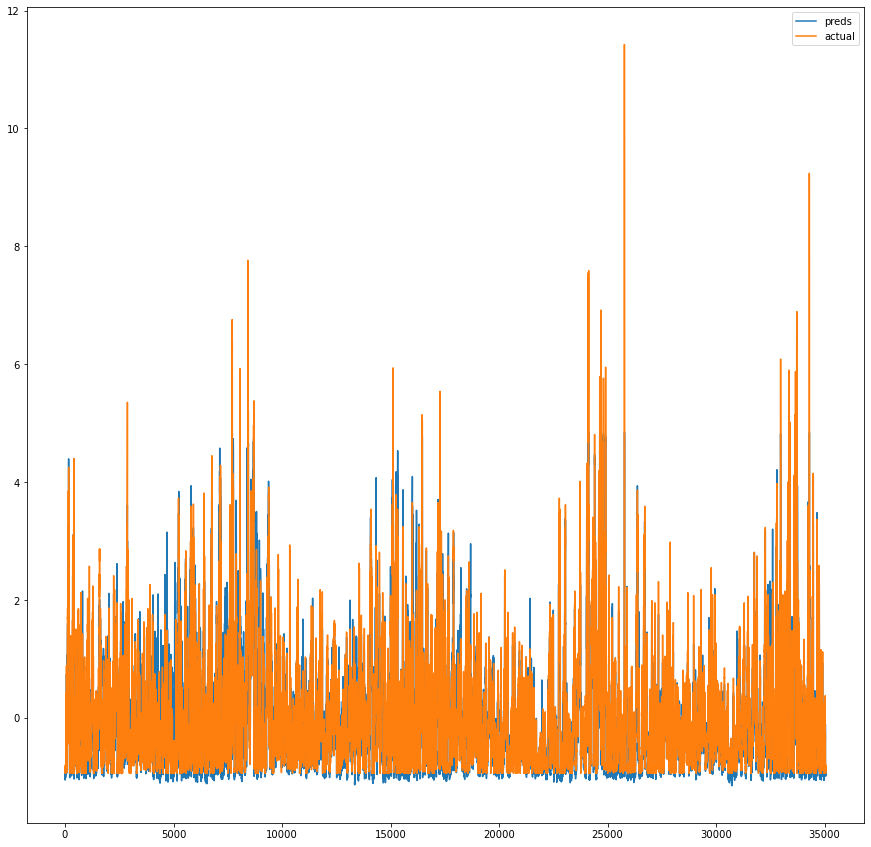

In [600]:
import matplotlib.pyplot as plt
x = np.arange(len(ys))

fig = plt.figure(figsize=(15, 15))
plt.plot(x, pred_y, label="preds")
plt.plot(x, ys, label="actual")
plt.legend()
plt.show()

In [583]:
ys.min()

-0.951009

In [364]:
(((pred_y - ys) ** 2).sum() / len(ys))

0.10622499132167251

In [609]:
pipeline

NameError: name 'pipeline' is not defined

In [1]:
len(ys)

NameError: name 'ys' is not defined